## NSE-TATAGLOBAL DATASETS

# Stock Market Prediction And Forecasting Using Stacked LSTM

# LGMVIP Task-2|| Data Science

#### To build the stock price prediction model, we will use the NSE TATA GLOBAL dataset. This is a dataset of Tata Beverages from Tata Global Beverages Limited, National Stock Exchange of India: Tata Global Dataset

## Import Libraries

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd
import io
import requests 
import datetime

## Import Datasets

In [4]:
url="https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv"
df=pd.read_csv(url)

In [5]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [6]:
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


### Shape of data

In [7]:
df.shape

(2035, 8)

### Gathering information about the data

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [9]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [10]:
df.dtypes

Date                     object
Open                    float64
High                    float64
Low                     float64
Last                    float64
Close                   float64
Total Trade Quantity      int64
Turnover (Lacs)         float64
dtype: object

## Data Cleaning

### Total percentage of data is missing

In [11]:
missing_values_count = df.isnull().sum()

total_cells = np.product(df.shape)

total_missing = missing_values_count.sum()

percentage_missing = (total_missing/total_cells)*100
print(percentage_missing)

0.0


In [12]:
NAN = [(c, df[c].isnull().mean()*100) for c in df]
NAN = pd.DataFrame(NAN, columns=['column_name', 'percentage'])
NAN

,column_name,percentage
0,Date,0.0
1,Open,0.0
2,High,0.0
3,Low,0.0
4,Last,0.0
5,Close,0.0
6,Total Trade Quantity,0.0
7,Turnover (Lacs),0.0


## Data Visualisation

<AxesSubplot:xlabel='Date'>

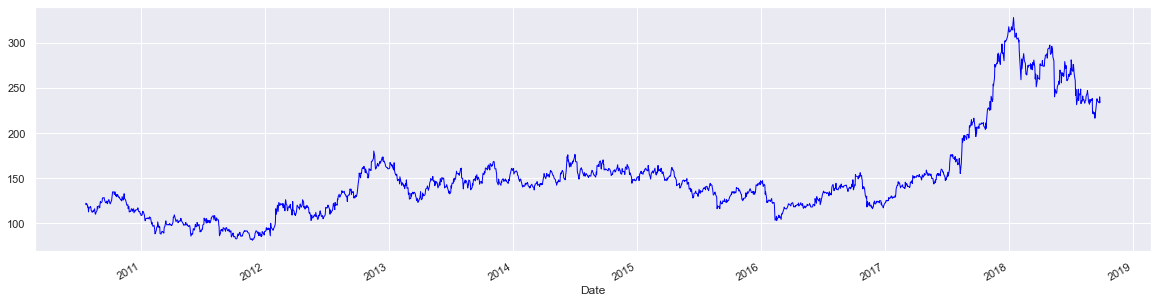

In [40]:
sns.set(rc = {'figure.figsize': (20, 5)})
df['Open'].plot(linewidth = 1,color='blue')

In [14]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

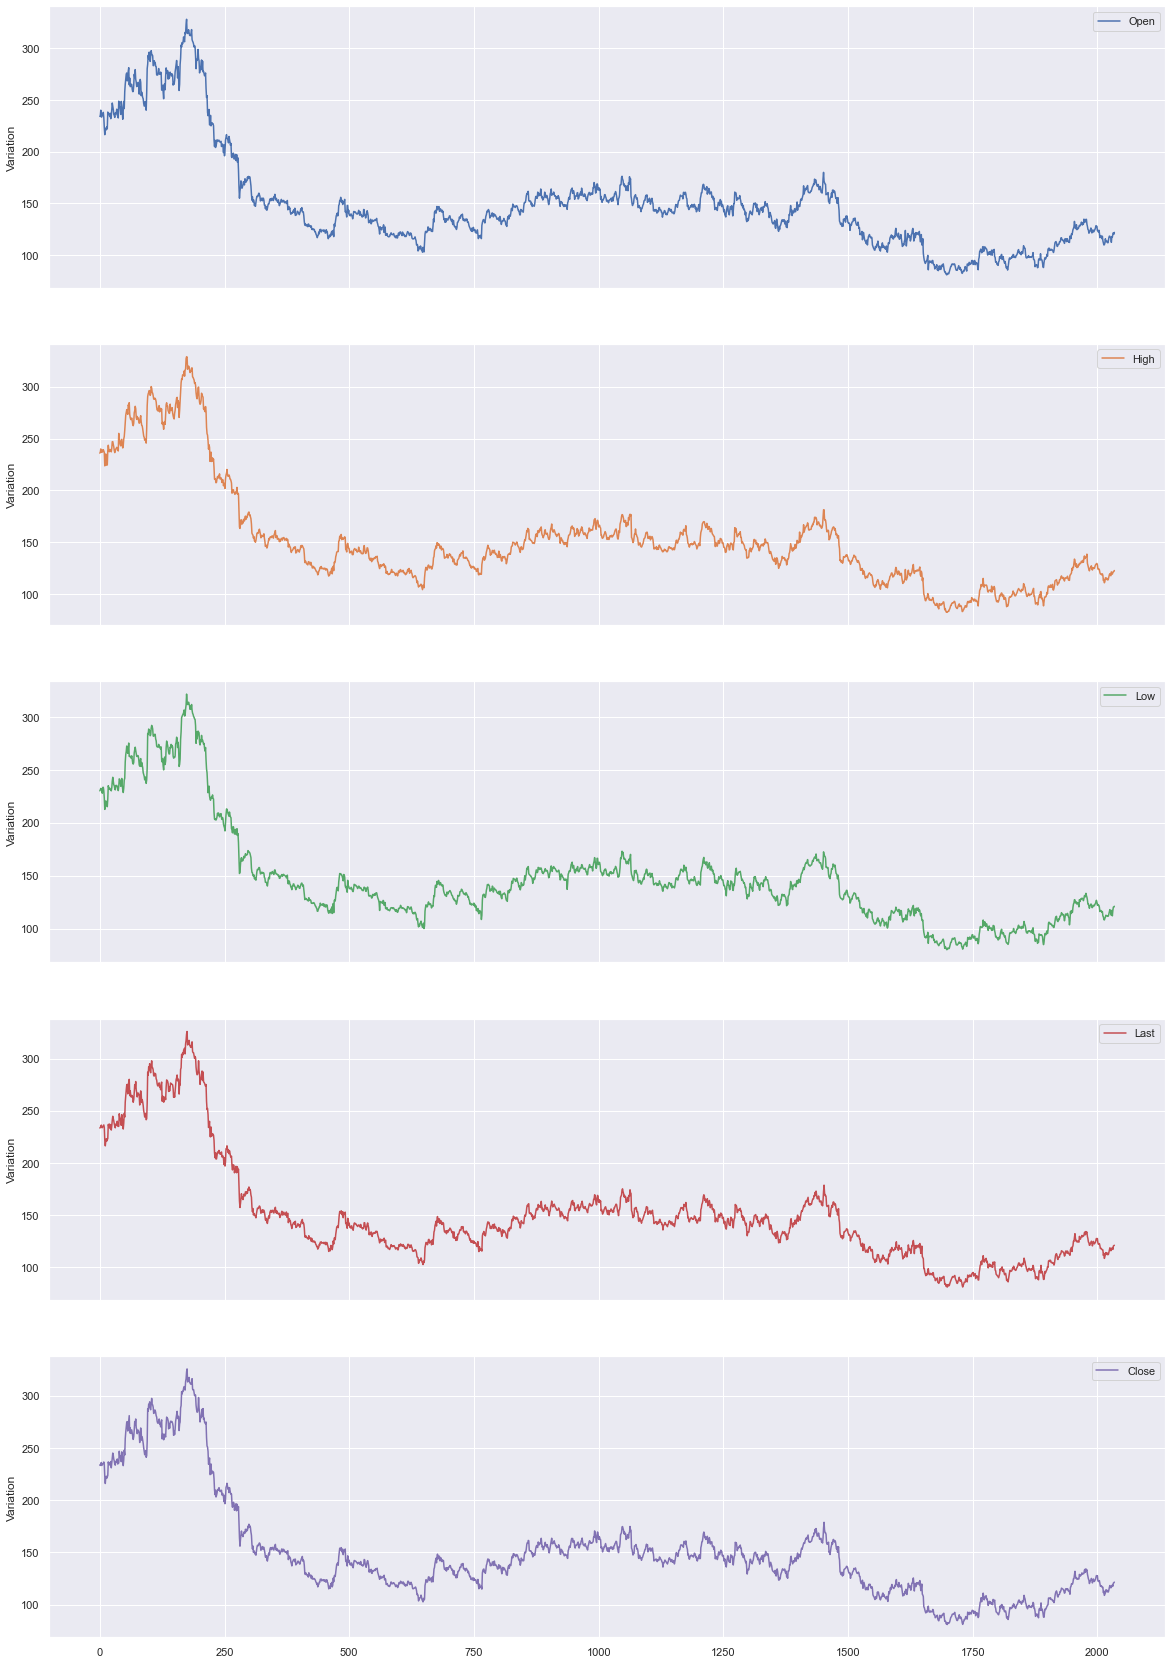

In [15]:
cols_plot = ['Open','High','Low','Last','Close']
axes = df[cols_plot].plot(alpha = 1, figsize=(20, 30), subplots = True)

for ax in axes:
    ax.set_ylabel('Variation')

## Sort the dataset on date time and filter “Date” and “Open” columns

In [16]:
df["Date"]=pd.to_datetime(df.Date,format="%Y-%m-%d")
df.index=df['Date']

In [17]:
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,,
2018-09-28,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
2018-09-27,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2018-09-26,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
2018-09-25,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2018-09-24,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2010-07-27,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2010-07-26,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2010-07-23,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31


In [18]:
del df["Date"]

In [19]:
df

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...
2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31


In [20]:
df.dtypes

Open                    float64
High                    float64
Low                     float64
Last                    float64
Close                   float64
Total Trade Quantity      int64
Turnover (Lacs)         float64
dtype: object

#### 7 day rolling mean 


In [21]:
df.rolling(7).mean().head(10)

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2018-09-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-19,235.200000,237.557143,231.135714,234.414286,234.307143,3.274848e+06,7652.388571
2018-09-18,235.750000,238.028571,231.607143,234.700000,234.492857,3.209831e+06,7509.724286
2018-09-17,235.550000,238.200000,231.485714,235.071429,234.971429,2.936693e+06,6879.075714


<AxesSubplot:xlabel='Date'>

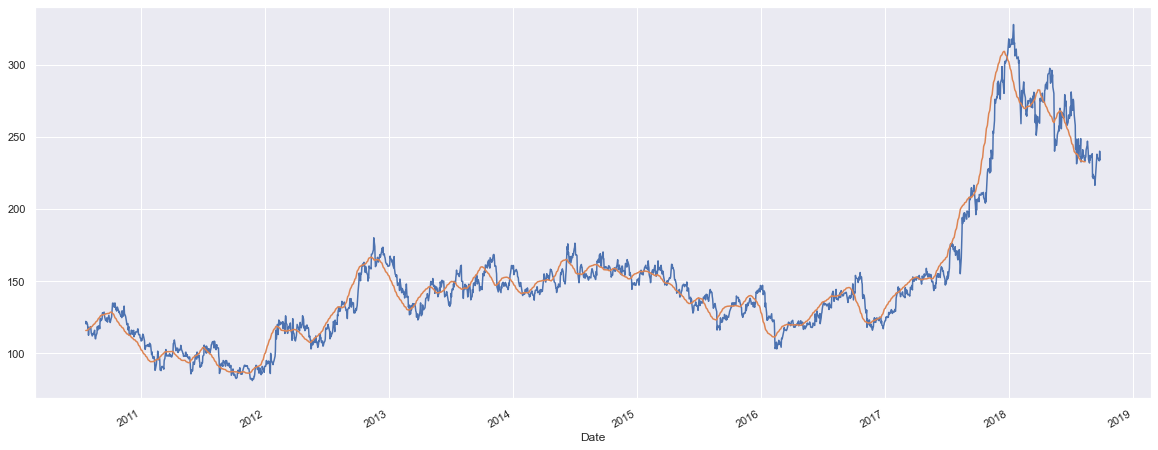

In [22]:
df['Open'].plot(figsize=(20,8),alpha = 1)
df.rolling(window=30).mean()['Close'].plot(alpha = 1)

<AxesSubplot:xlabel='Date'>

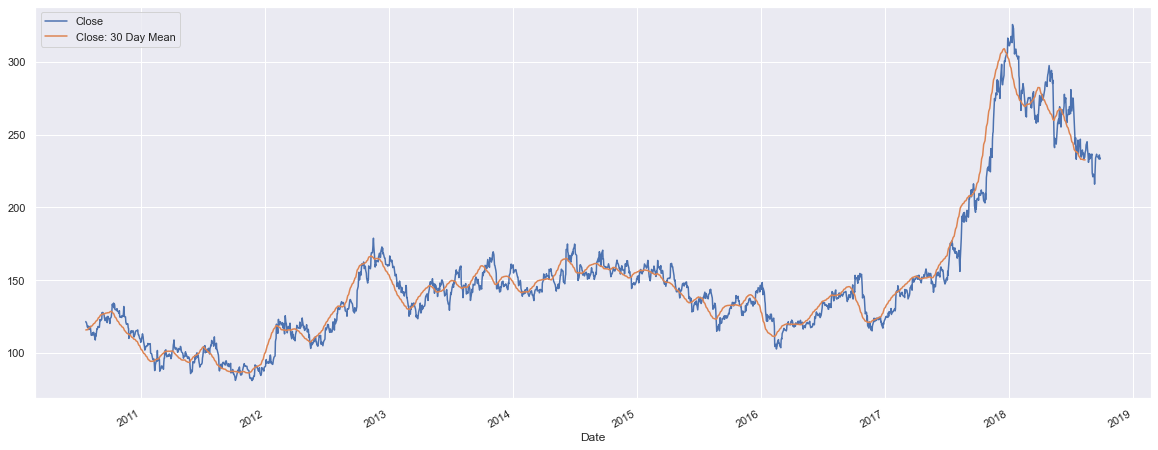

In [23]:
df['Close: 30 Day Mean'] = df['Close'].rolling(window=30).mean()
df[['Close','Close: 30 Day Mean']].plot(figsize=(20,8),alpha = 1)

### Optional specify a minimum number of periods

<AxesSubplot:xlabel='Date'>

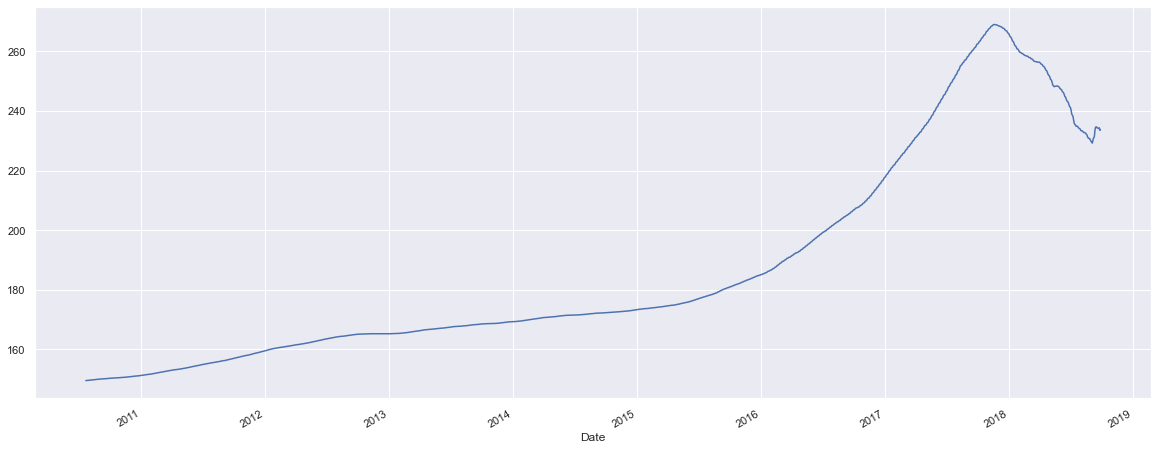

In [24]:
df['Close'].expanding(min_periods=1).mean().plot(figsize=(20,8),alpha = 1)

In [25]:
training_set=df['Open']
training_set=pd.DataFrame(training_set)

### Feaure Scaling

In [26]:
from sklearn.preprocessing import MinMaxScaler

In [27]:
scaler = MinMaxScaler(feature_range=(0,1))

In [28]:
training_set_df = scaler.fit_transform(training_set)

### Creating a data structure with 60 timeStamps and 1 output

In [29]:
train_x = []
train_y = []

for i in range(60,2035):
    train_x.append(training_set_df[i-60:i,0])
    train_y.append(training_set_df[i,0])

In [32]:
train_x, train_y = np.array(train_x),np.array(train_y)

#### Reshaping

In [33]:
train_x = np.reshape(train_x, ( train_x.shape[0], train_x.shape[1],1))

In [34]:
train_x.shape

(1975, 60, 1)

## Building The Model

In [35]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense

In [36]:
# initialise the Model
lstm_model=Sequential()

#### Add Input Layer & Regularization

In [37]:
# adding the first LSTM layer and add  some Dropout Regularization
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(train_x.shape[1],1)))
lstm_model.add(Dropout(0.2))

# adding the second LSTM layer and add  some Dropout Regularization
lstm_model.add(LSTM(units=50,return_sequences=True))
lstm_model.add(Dropout(0.2))  
               
# adding the third LSTM layer and add  some Dropout Regularization
lstm_model.add(LSTM(units=50,return_sequences=True))
lstm_model.add(Dropout(0.2))

#### Add output Layer 

In [38]:
lstm_model.add(Dense(units = 1))